 NTDS assignment 2: network models
====== 
[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), *PhD student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

For this assignment we will work on a network representing the collaboration between scientists in the field of General Relativity and Quantum Cosmology. The network comes from [SNAP](http://snap.stanford.edu/data/ca-GrQc.html) and is described as follows:

> Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print [arXiv](https://arxiv.org) and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author *i* co-authored a paper with author *j*, the graph contains a undirected edge from *i* to *j*. If the paper is co-authored by *k* authors this generates a completely connected (sub)graph on *k* nodes. The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv.

In [173]:
%matplotlib inline

import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [174]:
G = nx.read_edgelist(os.path.join('..', 'data', 'arxiv_collaboration_network.txt'))

In [175]:
print('My network has {} nodes.'.format(len(G.nodes())))
print('My network has {} edges.'.format(G.size()))

My network has 5242 nodes.
My network has 14496 edges.


# Analysis with model networks

## Comparing to model networks

1.1 In this part of the assignment, you have to create an Erdős–Rényi and Barabási-Albert graph using NetworkX, and compare them to the collaboration network. Try to simulate the original network as best as you can. When choosing parameters for the networks, take into account the number of vertices and edges of the original network. The number of vertices should be exactly the same. Comment on your choice of parameters.

### Create Erdős–Rényi  network

First, lets find the probability we should use to obtain a network with a similar number of edges that the one above.
Obviously, the number will not be exactly the same, but we want it to be as close as possible. We have:
$$\langle L \rangle = p \frac{N(N-1)}{2}$$

where:
  * $\langle L \rangle$ is the expected number of links
  * N is the number of nodes
  * p is the probability for the N-node network L links
   
 From there we can deduce the probability by setting $\langle L \rangle$ and N as the number of edges and nodes in the G graph, respectively. 

In [176]:
# The number of nodes is a fixed parameter
# It should be the same value as the arvix collaboration network (G)
NBR_OF_NODES_G = len(G.nodes())

# The expected number of links should be the same as the
# number of links in the arvix collaboration network (G)
NBR_OF_LINKS_G = G.size()

# Calculate the probability to use
p_er = 2* NBR_OF_LINKS_G /(NBR_OF_NODES_G * (NBR_OF_NODES_G-1))
print("The probability to use is {}".format(p_er))

# Generate the network
er = nx.erdos_renyi_graph(NBR_OF_NODES_G, p_er)

The probability to use is 0.001055278280507905


### Create Barabási-Albert network 

We need to find the parameter "m" to generate the network.
We have : 

$$ N = t$$
$$ L = m*t$$

Where
  * N is the number of nodes
  * L is the number of links
  * m is the parameter we want to extract
  
  
N and L can be extracted from the arvix collaboration network (G) number of
nodes and number of links.

In [177]:
# Calculate the parameter m, it must be an integer for nx
# Note: the rounding will yield us a graph that is has either
#       too many or too little edges compared to the original network
m_ba = round(NBR_OF_LINKS_G / NBR_OF_NODES_G)

# Generate the network
ba=nx.barabasi_albert_graph(NBR_OF_NODES_G, m_ba)

In [178]:
print('My Erdős–Rényi network has {} nodes.'.format(len(er.nodes())))
print('My Erdős–Rényi network has {} edges.'.format(er.size()))
print('My Barabási-Albert network has {} nodes.'.format(len(ba.nodes())))
print('My Barabási-Albert network has {} edges.'.format(ba.size()))

My Erdős–Rényi network has 5242 nodes.
My Erdős–Rényi network has 14467 edges.
My Barabási-Albert network has 5242 nodes.
My Barabási-Albert network has 15717 edges.


## Compare the largest components
Check the size of the largest connected component in each graph and compare them to the original network. In the Erdős–Rényi model, what should the probability of creating each edge be in order to have the same expected size of the largest component? Justify. Generate a graph with this parameter to check if you indeed get a similar value.

In [179]:
giant_G = max(nx.connected_component_subgraphs(G), key=len)
giant_er = max(nx.connected_component_subgraphs(er), key=len)
giant_ba = max(nx.connected_component_subgraphs(ba), key=len)
print("Size of giant component:\nG:\t{}".format(len(giant_G.nodes())))
print("E-R:\t{}".format(len(giant_er.nodes())))
print("B-A:\t{}".format(len(giant_ba.nodes())))

Size of giant component:
G:	4158
E-R:	5220
B-A:	5242


### Generate an Erdős–Rényi model with defind size of giant component

In the random graph, the number of nodes that are in the giant component (GC) is given by:
$$S  = 1 - e^{\langle k \rangle S} \Rightarrow \langle k \rangle = \frac{ln(1-S)}{S}$$
Where
  * S is the fraction of nodes in GC
  * $ \langle k \rangle$ is the averge degree
  
We also have the link probability in the graph as:
  $$ p = \frac{\langle k \rangle}{N-1} \Rightarrow p = \frac{ln(1-S)}{S(N-1)}$$
Where 
  * p is the link probability (the parameter of the Erdős–Rényi network
  * N is the number of nodes in the graph
  
Finally, we have S defined as:
$$ S = \frac{N_{GC}}{N}$$
Where
 * $N_{GC}$ is the number of nodes in the giant component (giant_G in our case)
 

In [180]:
# Calculate the parameters S and p defined above
S_giant = len(giant_G.nodes()) / NBR_OF_NODES_G

# We take the absolute value because the value obtained by the log is negative
p_giant = abs(np.log(1-S_giant)/(S_giant*(NBR_OF_NODES_G-1)))

print('The parameter p for an Erdős–Rényi network with the same expected size of the giant component is {}.'.format(p_giant))
print('The parameter p for the previously generated network was {}'.format(p_er))

The parameter p for an Erdős–Rényi network with the same expected size of the giant component is 0.00037911157202514926.
The parameter p for the previously generated network was 0.001055278280507905


In [204]:
# Generate the network
er_2 = nx.erdos_renyi_graph(NBR_OF_NODES_G, abs(p_giant))
er_giant = max(nx.connected_component_subgraphs(er_2), key=len)
print('The size of the component in a randomly generated network with this parameter is {}.'.format(len(er_giant.nodes())))
print('The size of the component in the G network was {}'.format(len(giant_G.nodes())))

The size of the component in a randomly generated network with this parameter is 4120.
The size of the component in the G network was 4158


## Analyse the clustering coefficients
Look at the clustering coefficient of the original network. Is there a network model we talked about that could have a clustering coefficient that is close? Explain.

In [182]:
nx.average_clustering(G)

0.529635811052136

### Analyse clustering coefficients of already generated network
First, lets look at the clustering coefficient of the networks we generated.

In [205]:
print("Average clustering of generated networks")
print("E-R:\t {}".format(nx.average_clustering(er)))
print("B-A:\t {}".format(nx.average_clustering(ba)))
print("E-R 2:\t {}".format(nx.average_clustering(er_2)))

Average clustering of generated networks
E-R:	 0.0010165149615740984
B-A:	 0.011298315153641101
E-R 2:	 0.0


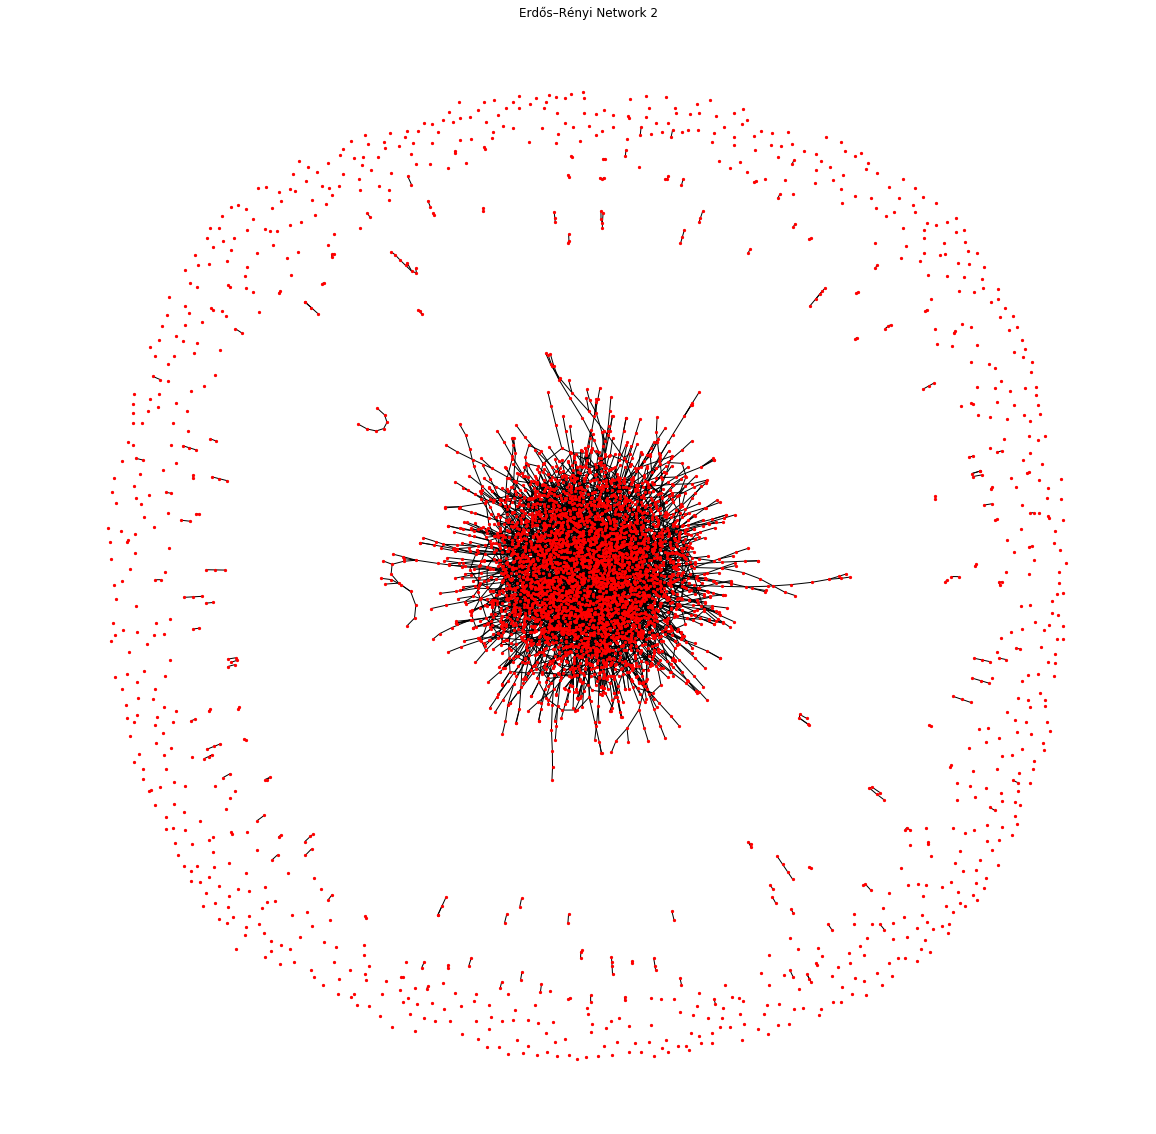

In [209]:
# The result fo E-R 2 is null
# lets print the network to see what happenned
nx_options = {
    'node_size': 5,
    'width' : 1,
}
plt.figure(figsize=(20,20))
plt.title("Erdős–Rényi Network 2")
nx.draw(er_2, **nx_options)
plt.show()

We see that the clustering coefficient of those networks are way smaller than the one from the natural network.
This is an expected result, but this test was use full to confirm it.
Also, we can see that reducing the connection probability in the Erdős–Rényi network was able to solve our edge number problem, but the network now has an average clustering that is even farther than the one of the original network: many nodes don't have edges and the paths we can see don't create clusters, but a linear "road" of nodes, which is why the clustering coefficient is actually 0 (the average must be so low that it gets rounded down by floating point error). 

### Watts-Strogatz network
In class, we saw another way to generate networks called the Watts-Strogatz model. 
This model is in-between the regular network model and the random network model.
The propriety of interest of this type of network is that it can generate high clustering coefficient whilst the two other methods we used can't.

In [184]:
# Find the parameters to generate the graph

# N_ws is the number of nodes ofthe graph
N_ws = NBR_OF_NODES_G
# K_ws is the mean degree of the graph
# Note: we round K_ws because networks requires it tobe an int
K_ws = round((NBR_OF_LINKS_G * 2) / NBR_OF_NODES_G)
# We need to chose p_ws, the probability of rewiring each edge
# so that we obtain the desired cluster coefficient

To chose this probability , we used the following properties extracted from [the Wikipedia article on the subject](https://en.wikipedia.org/wiki/Watts%E2%80%93Strogatz_model "Watts–Strogatz model")

$$C(0) = \frac{3(K-2)}{4(K-1)}$$
where
  * K is the mean degree of the graph
  * $C(0)$ is the clustering coefficient for a ring lattice (regular network)
 
We also have:
$$C'(\beta) \approx C(0)(1-\beta)^3 \Rightarrow \beta \approx 1-\sqrt[3]{ \frac{C'(\beta)}{C(0)}}$$
where
  * $\beta$ is the probability of rewiring each edge (p_ws in the code)
  * $C'(\beta)$ is the targeted clustering coefficient

In [185]:
# calculate the rewiring probability
p_ws = 1- ((nx.average_clustering(G)/((3*(K_ws-2))/(4*(K_ws-1))))**(1/3))

In [186]:
# Generate the graph
ws = nx.watts_strogatz_graph(N_ws, K_ws, p_ws)

# Print the average clustering of the resultign graph
print("Average clustering of the graph generated using the Watts-Strogatz method is {}".format(nx.average_clustering(ws)))
print("The average clustering of the graph G was {}".format(nx.average_clustering(G)))

Average clustering of the graph generated using the Watts-Strogatz method is 0.5312886454339829
The average clustering of the graph G was 0.529635811052136


From this result it is clear that the method viewed in class can effectively generate a graph with the proper average clustering.

#  Creating a network with a predefined degree distribution

In this part of the assignment, you will have to create a random network from a predefined degree distribution. There are several network models which can create a random network with the exact same degree distribution as the original, or with the same expected distribution as the original. Refer to section 4.8 of [the Barabási book](http://networksciencebook.com) for more information.

One of the most famous ones is the configuration model. The model for a graph with $L$ edges in total is constructed in the following steps:

- Assign a degree to each node, represented as stubs (half-links). The degree sequence is either generated analytically from a preselected distribution, or it is extracted from the adjacency matrix of a real network. Note that we must start from an even number of stubs to avoid being left with unpaired stubs.
- Randomly select a stub pair and connect them. Then randomly choose another pair from the remaining $2L - 2$ stubs and connect them. This procedure is repeated until all stubs are paired up.

*Reminder:* A stub is a half-link, representing the half of an edge. It contains one node and can be paired up with another stub to create an edge (between the two corresponding nodes).

## Generate a network with a greedy configuration model
However, this model allows for the creation of multi-links (multiple edges between the same pair of vertices) and self-loops, thus leading to a non-simple graph. In this assignment, you will implement a greedy configuration model, to avoid these problems.

The algorithm goes as follows:
- Extract the degree sequence from our collaboration network.
- Assign a target degree to each node, represented as stubs or half-links. Use the degree sequence extracted from the collaboration network.
- Sort the nodes by degree. 
    - Pick the node with the highest target degree. Delete all its stubs from the list of stubs to make sure we don't create a self loop.
    - Until all its weighted degree equals its target degree: 
        - Randomly select one stub from the list of stubs (corresponding to one of the other nodes), and connect these two nodes. In case the two chosen nodes are already connected, simply increase the weight of this edge by one. Be careful to randomly select from stubs and not from nodes, as this means the chances of selecting a node will be proportional to its target degree.
    - When the number of edges adjacent to this node corresponds to its target degree, go on to the second node in the list. 
    - Repeate this procedure until all stubs are paired up, or there is only one node left with a pair number of stubs. In that case, don't create a self-loop, but discard the stubs.
    
*Hints*: 
 - Use `nx.empty_graph()` to create an empty graph.
 - Use `G.add_edge(node1,node2,weight = 1)` to add an edge to a weighted graph.
 - Use `G.edge[node1][node2]['weight'] += 1` to increment the weight of an edge by one.

In [187]:
def greedy_configuration(degree_distribution):
    """Generate a weighted graph from a degree distibution
    """
    nbr_of_nodes = len(degree_distribution)
    
    # We create a stub list, it contains the node number of the stub and the stub number in the node
    stub_list = [[node, stub] for node, nbr_of_stubs in enumerate(degree_distribution) for stub in range(nbr_of_stubs) ]
    stub_df = pd.DataFrame(stub_list, columns=["node", "stub"])
    
    #print(degree_distribution)
    #display(stub_df)
    
    # Create the empty graph
    G = nx.empty_graph()
    
    # Because nodes are ordered, we can use the algorithm in an
    # increasing node index fation whilst preserving the 
    # target of using the "highest degree node" at each loop
    for node in range(nbr_of_nodes):
        # Get the index of the stubs associated with the current node that are not deleted
        index_of_node_stubs = stub_df.index[(stub_df["node"] == node)]
        
        # Sanity check : is node all deleted?
        if index_of_node_stubs.empty:
            continue
        
        # Delete the stubs from the index
        stub_df.drop(index_of_node_stubs, inplace=True)
        
        # Get random stubs
        rand_list_of_stubs = stub_df.sample(n=len(index_of_node_stubs))
        
        # Link the stubs to the current node and delete them
        for stub in rand_list_of_stubs.itertuples():
            try:
                G.edge[node][stub.node]["weight"] += 1
            except:
                G.add_edge(node, stub.node, weight=1)
            finally:
                stub_df.drop(stub.Index, inplace=True)
    
    return G

In [188]:
degree_distribution=sorted(nx.degree(G).values(),reverse=True) # degree distribution sorted from highest to lowest

gc = greedy_configuration(degree_distribution)

## Validate generated network consistency
Verify that the networks have the same number of nodes. Plot the difference between the weighted degree distributions to verify that they are identical. If not, why?

In [189]:
degree_sequence_gc=sorted(nx.degree(gc, weight = 'weight').values(),reverse=True) #weighted degree distribution

In [190]:
# Compare the number of nodes
print("The difference in number of nodes is {}".format(len(degree_sequence_gc)-len(degree_distribution)))

The difference in number of nodes is 0


In [191]:
# Compare the degree distributions
degree_distribution_difference = np.subtract(degree_sequence_gc, degree_distribution)
print(degree_distribution_difference[np.nonzero(degree_distribution_difference)])

[]


We can see that the degree distribution are identical because every values in the difference is null.

Though, it would be possible to have non-identical degree distributions in the case that a node would end up having two stubs with all other nodes having no stubs remaining.
This is unlikely, because many nodes have low numbers of stubs and those nodes act as buffer for this case because we process them at the end, but they could be deleted by the random sampling beforehand.


##  Adjacency matrices analysis
Should these two networks have the same adjacency matrices? Justify.

The two network will most likely not have the same adjacency matrices. Although we have nodes with the same degree distribution, the edges of those nodes are not correlated between the two networks. Also, the numbering of the nodes is not consistent between both networks, which force the adjacency matrix to be different, even if all the edges are linked and weighted similarly (in this case a transposition of the node numbers could yield the same adjacency matrix, but this situation is highly unlikely!)

In [192]:
# Lets compare the adjacency matrix
# Mainly to prove the point above
g_adj = nx.adjacency_matrix(G)
gc_adj = nx.adjacency_matrix(gc)

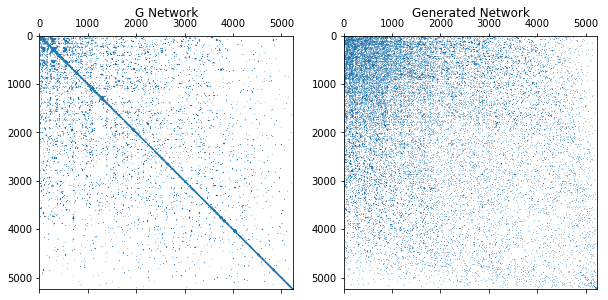

In [193]:
# We compare the matrixes visually
f, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].set_title("G Network")
ax[1].set_title("Generated Network")
ax[0].spy(g_adj,markersize=0.1)
ax[1].spy(gc_adj,markersize=0.1)
plt.show(f)

The adjacency matrix are clearly different.

It is interesting to note the dense diagonal section in the G Network. From this we can assume that the nodes in the source network are linked to close nodes (with similar numbering). This is likely a symptom of the fact that the authors where classified temporarily, oldest addition first. This means that recent authors will have close connections to their neighbors, because they likely published together! Also, another symptom of this fact is that smaller-numbered nodes seem to have denser connection, especially between the first nodes. This can be a symbol of an "expanding field" where the early authors where part of a small community and published mainly with each other in a small pool. As time pass and more searcher publish to the field, the links get more sparse, but they likely publish in the lab of one of those "old" searcher and there's still connection to those. As time pass, the links with newer searchers from the old nodes get more sparse, is this a symbol of aging and retirement from the early searcher?

## Visual analysis of the networks
Draw both the generated and original networks. Are they similar? If not, why? Try to explain.

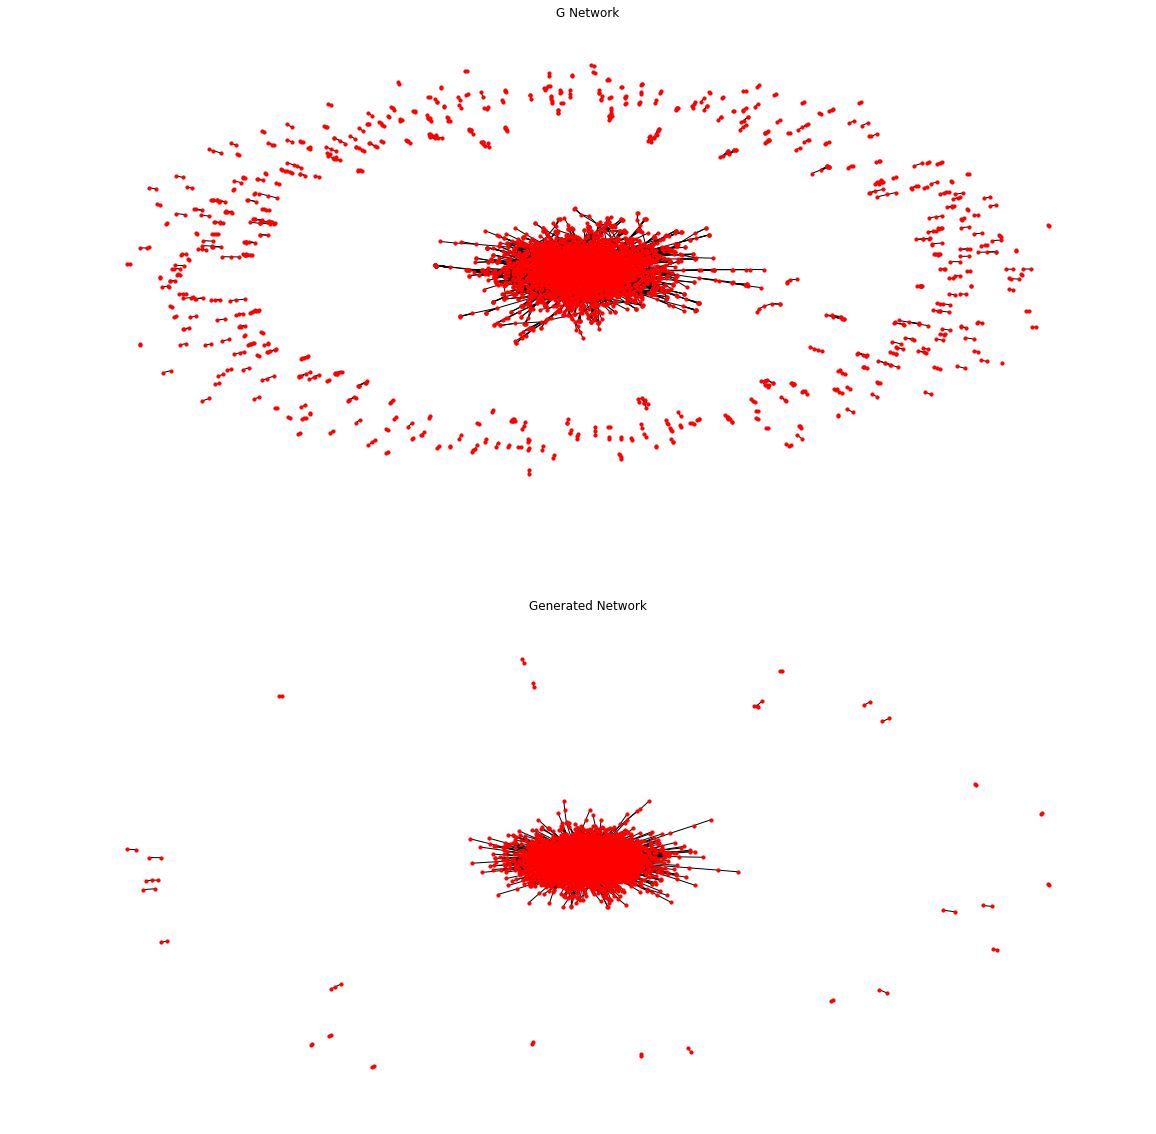

In [194]:
nx_options = {
    'node_size': 10,
    'width' : 1,
}
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.title("G Network")
nx.draw(G, **nx_options)
plt.subplot(212)
plt.title("Generated Network")
nx.draw(gc, **nx_options)
plt.show()

The two networks are quite different. We can see that the generated network has a denser cluster in the middle and that it doesn't have many small "external" clusters which form a belt around the central cluster in the G network. This is linked to the fact that there's a tendency for some research paper to be published by searchers that will not publish with other people in the field, or with a limited amount. This mean that there's some smaller clusters that are not linked to the central cluster. The method we use to generate our network limits the potential of such small cluster to occur.

Indeed, by generating the clusters from the major nodes at the start, we give the larger clusters a "first hand" in the node selections: because they get assigned first, they will tend to take many stubs from the small nodes. When it's time for those node to use they stubs, they most likely have already been filled, so they can't cluster with smaller nodes, or are already partly linked to larger nodes which force them to be part of the larger cluster. Though, we see that there's still a probability that the small nodes will only link to small nodes, which is why there's still some nodes on the belt in the generated network.

We could try to generate a network which select nodes in a random fashion to avoid this kind of problem. The risk is that larger node might end up at the end of the selection and have no options but to drop their links because they can't create self links. Because of this, a preference should still be given to "larger nodes", but there should be a possibility to have more "small nodes" in the beginning of the stub selection process.

Another thing we notice, is the fact that the generated network's cluster is denser than the one of the G network. This is also due in a "reality fact" that is present in the real network but not in the generated network: if a paper has been published, it is likely by a lab and the researchers are likely to work together often. Because of this, there's likely more high weight edges in the G network than in the generated network. Higher weighted edges leads to less edges from node to node, which in turns entail  a less dense network because they will be more nodes that will have fewer edges or clusters that have only one or a few edges going into the bigger clusters. 

To reduce this problem, we could give preferential stub selection to nodes that already have an edge in between. This could be done by creating a weighted selection in the "sample" function to add preferential selection. This weighted selection, principally the "added probability" given to stubs of a nodes already sharing links to the current node,  could be determined by examining the average weight of the edges (and other statistical parameters) in the system and to create an optimization function that changes the "added probability" parameter until the graphs generated have edges that have similar weights than the ones in the source network.

## Network properties
*2.5* Do you expect the properties studied in the first part of the assignment to be close to the original graph? Justify.

The properties studied are : the number of nodes and edges, the largest component and the clustering coefficient.

The number of node is forced to be the same by design. Although it could vary by one in the case that a 2 connection node gets dropped because no external stubs are available, this situation didn't happen in our case and is highly unlikely.

The total weight of the edges is going to be the same in both networks. Though, the total number of edges in the generated network will be higher than in the generated graph, because of the preferential edge creation in the real network, such as we have discussed in the previous section.

The largest component should be bigger in the generated network than in the  original network. This is a direct consequences of the points we have explained in the section above: there's less small clusters or small components in the generated network, which implies that the large cluster or biggest component will be larger. It is hard to exactly know how much bigger so lets calculate the number of nodes in the largest component of the generated network


In [199]:
giant_gc = max(nx.connected_component_subgraphs(gc), key=len)
print("The giant component of the generated network has {} nodes of {} total nodes, a ratio of {:.2f}%".format(len(giant_gc.nodes()),
                                                                                                           len(gc.nodes()),
                                                                                                           (len(giant_gc.nodes())/ len(gc.nodes()))*100))
print("The giant component of the original network has {} nodes of {} total nodes, a ratio of {:.2f}%".format(len(giant_G.nodes()),
                                                                                                          len(G.nodes()),
                                                                                                          (len(giant_G.nodes())/ len(G.nodes()))*100))

The giant component of the generated network has 5184 nodes of 5242 total nodes, a ratio of 98.89%
The giant component of the original network has 4158 nodes of 5242 total nodes, a ratio of 79.32%


We can indeed see that the giant component is much larger in the generated graph. It includes almost all of the nodes of the graph whilst in the original graph its only about 4/5th of the nodes that are in the large cluster.

The clustering coefficient of the generated graph should be smaller than the one of the original graph. This is clear from our observation above: there's a clear link between nodes in the original graph, which mean that they tend to cluster more. There's no such link in the generated graph, nodes from which to create links are selected randomly and thus have equal chance of being linked to another node (obviously with a shift depending on the number of edges of the source and target node). Lets calculate the clustering coefficient of the generated graph to validate this point.

In [202]:
print("The average clustering of the generated network is {:.5f}".format(nx.average_clustering(gc)))
print("The average clustering of the original network is {:.5f}".format(nx.average_clustering(G)))
print("The original network as an average clustering {:.2f} times"
      " larger than the generated network".format(nx.average_clustering(G)/nx.average_clustering(gc)))

The average clustering of the generated network is 0.00730
The average clustering of the original network is 0.52964
The original network as an average clustering 72.59 times larger than the generated network


The measurement is clear: the clustering of the generated network is much smaller than the one of the original network.

Overall, we can see that this method of generation can conserve the degree distribution of the original graph, but that it is not able to conserve other properties of the original graph.